**Creation of the timelines of events and gunrelated quotations in English-speaking newspaper**

# TIMELINE

https://pretagteam.com/question/timeline-in-python
https://vizzlo.com/create/pictograph
https://insightwhale.com/how-to-visualize-frequency-distribution-best-methods/
https://towardsdatascience.com/how-to-create-interactive-map-plots-with-plotly-7b57e889239a

In [51]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import pandas as pd
import seaborn as sns
import math
import json
import bz2
import urllib
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import nltk
import ssl
from scipy import stats

%matplotlib inline
sns.set(font_scale = 1.3, rc = {'figure.figsize':(26,10)})
sns.set_palette('colorblind')
data_folder = 'data/'

In [2]:
# For the interactive plots
import plotly.express as px
import plotly.graph_objects as go

# To save interactive plot to Theo's account
import chart_studio
import chart_studio.plotly as py
chart_studio.tools.set_credentials_file(username='patron.theo', api_key='5KgUcU30ZBwrGySXXwTL')
chart_studio.tools.set_config_file(world_readable=True, sharing='public')

## Load the data

In [3]:
df = pd.read_json('data/gundata.json.bz2', orient='columns', lines=False, compression='bz2')
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,nationality,gender,occupation,age,ethnic_group,party,religion,american
0,2015-07-23-051091,If you look at the number killed by gun violen...,President Obama,[Q76],2015-07-23 10:46:00,1,"[[President Obama, 0.523], [None, 0.477]]",[http://www.washingtonpost.com/blogs/post-poli...,E,[United States of America],[male],"[politician, lawyer, political writer, communi...",60.0,"[African Americans, Multiracial American, Luo ...",[Democratic Party],"[Protestantism, congregational church, Congreg...",True
1,2015-04-21-033678,It's $100 for the Firearm Identification Card ...,Jim Wallace,"[Q16751191, Q333807, Q6145053, Q6198737, Q6198...",2015-04-21 10:05:54,1,"[[Jim Wallace, 0.5226], [None, 0.4774]]",[http://bostonglobe.com/metro/2015/04/20/gun-l...,E,[United Kingdom],[male],"[association football player, association foot...",67.0,None,None,None,False
2,2015-11-05-079031,Michele Fiore's 2016 Walk the Talk 2nd Amendme...,Michele Fiore,"[Q16198552, Q38359549, Q38589687]",2015-11-05 15:47:22,5,"[[Michele Fiore, 0.5068], [None, 0.4125], [Cli...",[http://rgj.com/story/news/2015/11/05/michele-...,E,[United States of America],[female],[politician],51.0,None,[Republican Party],None,True
3,2015-10-13-054087,"It is a constitutionally-protected right, like...",Wendy Davis,"[Q3539529, Q47358063, Q59160484, Q7982632]",2015-10-13 23:31:37,1,"[[Wendy Davis, 0.7397], [None, 0.2302], [Ben C...",[http://feeds.huffingtonpost.com/c/35496/f/677...,E,[United States of America],[female],"[actor, television actor, film actor]",55.0,None,None,None,True
4,2015-12-02-067905,It's still an active situation. FBI is on the ...,President Obama,[Q76],2015-12-02 22:42:13,3,"[[President Obama, 0.5268], [None, 0.4202], [N...",[https://www.whitehouse.gov/blog/2015/12/02/pr...,E,[United States of America],[male],"[politician, lawyer, political writer, communi...",60.0,"[African Americans, Multiracial American, Luo ...",[Democratic Party],"[Protestantism, congregational church, Congreg...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69958,2020-02-20-086887,"We have to stop guns from being in our city, w...",Muriel Bowser,[Q6938597],2020-02-20 01:31:37,1,"[[Muriel Bowser, 0.9543], [None, 0.0457]]",[https://www.nbcwashington.com/news/local/susp...,E,[United States of America],[female],[politician],49.0,[African Americans],[Democratic Party],None,True
69959,2020-04-11-028326,These same communities continue to be plagued ...,Lori Lightfoot,[Q56486914],2020-04-11 13:15:27,3,"[[Lori Lightfoot, 0.9327], [None, 0.0584], [Jo...",[http://abc11.com/african-americans-in-chicago...,E,[United States of America],[female],"[politician, lawyer]",59.0,[African Americans],[Democratic Party],[Christianity],True
69960,2020-01-13-007350,ATF's priority of removing the criminal elemen...,Marcus Watson,"[Q21061663, Q30501613, Q6758525]",2020-01-13 20:47:15,1,"[[Marcus Watson, 0.5876], [None, 0.4124]]",[https://www.al.com/news/birmingham/2020/01/fo...,E,[United Kingdom],[male],"[rugby union player, rugby sevens player]",30.0,None,None,None,False
69961,2020-01-29-024062,Gun violence is robbing our young people of th...,Kenyatta Johnson,[Q6392916],2020-01-29 00:05:06,1,"[[Kenyatta Johnson, 0.8978], [None, 0.1022]]",[https://www.nbcphiladelphia.com/news/local/on...,E,[United States of America],[male],[politician],NaN,[African Americans],[Democratic Party],None,True


## Gunquotes timeline for the whole time range January 2015 to April 2020

In [4]:
# Useful function for the following plots

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [7]:
# Check that there are quotations in every months

df['dateWithoutTime'] = df['date'].dt.normalize()
print(df['date'].dt.to_period('M').unique())
if (len(df['date'].dt.to_period('M').unique())==64):
    print('There are 64 different months in our dataset, there is at least 1 quotes per month (from January 2015 to April 2020).')

<PeriodArray>
['2015-07', '2015-04', '2015-11', '2015-10', '2015-12', '2015-03', '2015-08',
 '2015-09', '2015-05', '2015-01', '2015-02', '2015-06', '2016-08', '2016-09',
 '2016-02', '2016-07', '2016-12', '2016-05', '2016-03', '2016-04', '2016-06',
 '2016-11', '2016-01', '2016-10', '2017-03', '2017-10', '2017-08', '2017-12',
 '2017-06', '2017-11', '2017-05', '2017-02', '2017-04', '2017-09', '2017-07',
 '2017-01', '2018-02', '2018-04', '2018-08', '2018-10', '2018-03', '2018-06',
 '2018-11', '2018-09', '2018-07', '2018-01', '2018-12', '2018-05', '2019-03',
 '2019-07', '2019-08', '2019-09', '2019-02', '2019-05', '2019-12', '2019-04',
 '2019-10', '2019-06', '2019-11', '2019-01', '2020-01', '2020-02', '2020-03',
 '2020-04']
Length: 64, dtype: period[M]
There are 64 different months in our dataset, there is at least 1 quotes per month (from January 2015 to April 2020).


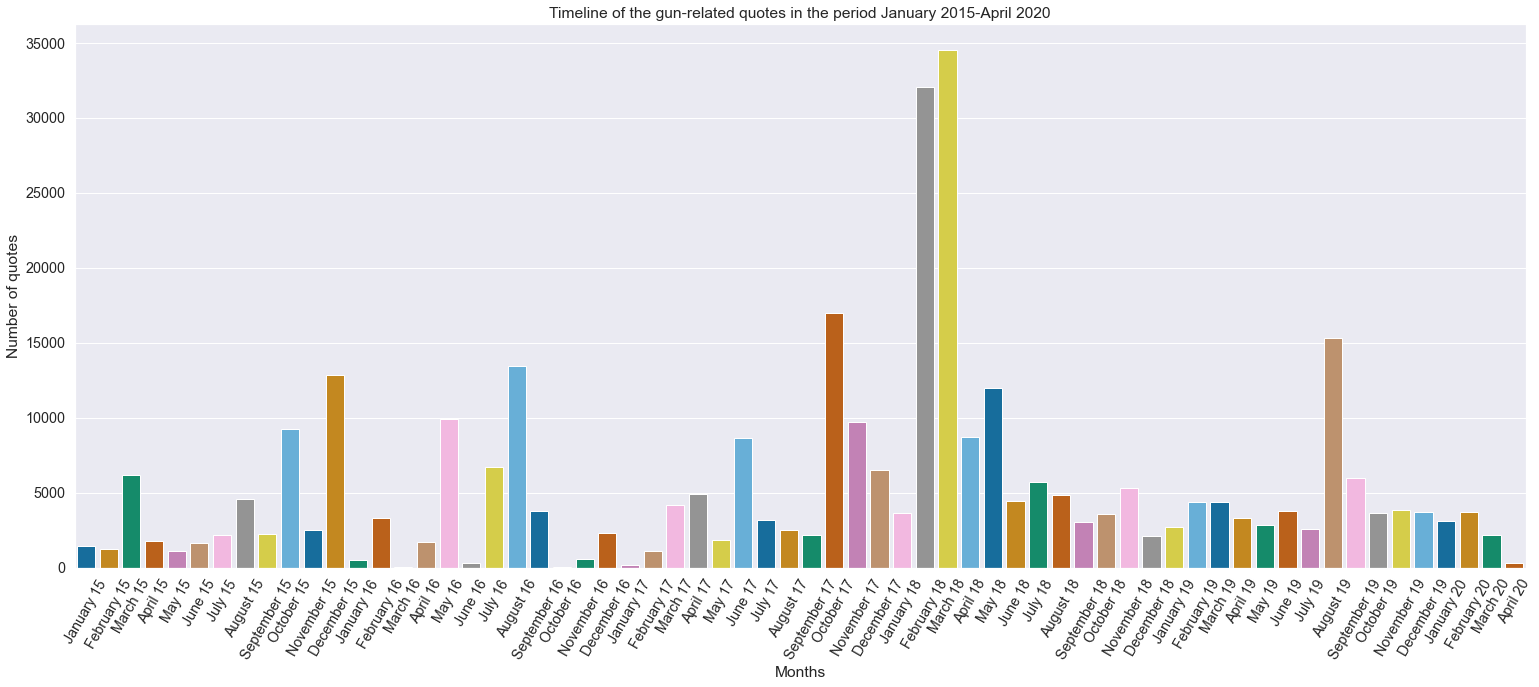

In [15]:
## Plot of the number of quotes related to guns in function of the month

df['dateWithoutTime'] = df['date'].dt.normalize()

ax = sns.barplot(x=np.linspace(1,64,64), y=df.groupby(df['date'].dt.to_period('M')).numOccurrences.sum(), palette='colorblind')#, data=gunquotes)
ax.set_xlabel('Months')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotes in the period January 2015-April 2020')
labels = ['January 15', 'February 15', 'March 15', 'April 15', 'May 15', 'June 15', 'July 15', 'August 15', 'September 15', 'October 15', 'November 15', 'December 15', 'January 16', 'February 16', 'March 16', 'April 16', 'May 16', 'June 16', 'July 16', 'August 16', 'September 16', 'October 16', 'November 16', 'December 16', 'January 17', 'February 17', 'March 17', 'April 17', 'May 17', 'June 17', 'July 17', 'August 17', 'September 17', 'October 17', 'November 17', 'December 17', 'January 18', 'February 18', 'March 18', 'April 18', 'May 18', 'June 18', 'July 18', 'August 18', 'September 18', 'October 18', 'November 18', 'December 18', 'January 19', 'February 19', 'March 19', 'April 19', 'May 19', 'June 19', 'July 19', 'August 19', 'September 19', 'October 19', 'November 19', 'December 19', 'January 20', 'February 20', 'March 20', 'April 20']
ax.set_xticklabels(labels)
plt.xticks(rotation=60)
# show_values(ax)
plt.show()

This timeline of the gun related quotes reveals some high peaks in the frequency of quotes. One can guess that these peaks are related to some events like mass shooting or political evaluations or debates on the 2nd Amendment.... Our study will more precisely focus on the mass shooting events as after some researchs, we observed that many of the peaks were related to the deadliest mass shootings. On the following graph that is visible on the website, the frequency timeline of the gunquotes is plotted along with some of the deadliest mass shootings in the USA, in the period from January 2015 to April 2020. As there are a very huge amount of mass shootings in the USA, (see the link below, pretty depressing), we selected only the mass shootings that implied more than 10 deads. These events can also be visualized in this Jupoyter Notebook in the graph just below.  
For the following of the study we will focus on two big events.  
Source : https://en.wikipedia.org/wiki/List_of_mass_shootings_in_the_United_States

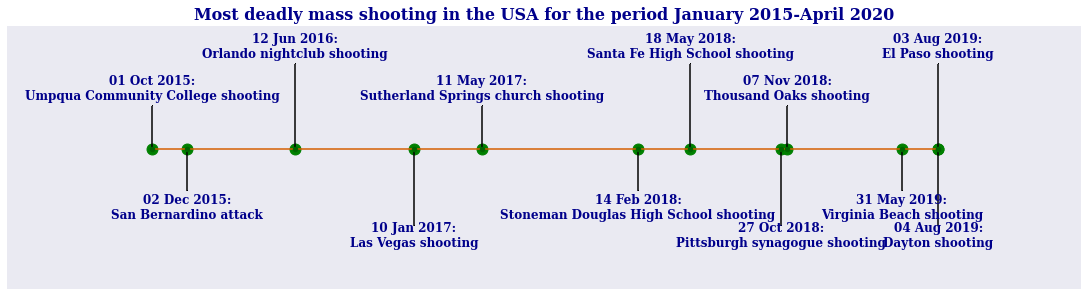

In [95]:
dates = [date(2015,10,1), date(2015,12,2), date(2016,6,12), date(2017,1,10), date(2017,5,11), date(2018,2,14), date(2018,5,18), date(2018,10,27), date(2018,11,7), date(2019,5,31), date(2019,8,3), date(2019,8,4)]
# date(2017, 6, 14), date(2017, 6, 22),
min_date = date(2015, 1, 15)
max_date = date(2020, 4, 15)

labels_events = ['Umpqua Community College shooting', 'San Bernardino attack', 'Orlando nightclub shooting', 'Las Vegas shooting', 'Sutherland Springs church shooting', 'Stoneman Douglas High School shooting', 'Santa Fe High School shooting', 'Pittsburgh synagogue shooting', 'Thousand Oaks shooting', 'Virginia Beach shooting', 'El Paso shooting', 'Dayton shooting']
# 'Congressional baseball shooting', 'Pizzagate murderer\'s sentence'
labels_events = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels_events, dates)]


fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
_ = ax.set_ylim(-2, 1.75)
_ = ax.set_xlim(min_date, max_date)
_ = ax.arrow(0, 0, 20, 15, color='black', zorder=1, linewidth=4)
 
_ = ax.scatter(dates, np.zeros(len(dates)), s=120, c='green', zorder=2)
_ = ax.scatter(dates, np.zeros(len(dates)), s=20, c='darkgreen', zorder=3)


label_offsets = np.zeros(len(dates))
label_offsets[::4] = 0.7
label_offsets[2::4] = 1.3
label_offsets[1::4] = -1.0
label_offsets[3::4] = -1.4
for i, (l, d) in enumerate(zip(labels_events, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='darkblue',fontsize=12)
    
stems = np.zeros(len(dates))
stems[::4] = 0.6
stems[2::4] = 1.2
stems[1::4] = -0.6
stems[3::4] = -1.1   
markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
_ = plt.setp(markerline, marker=',', color='black')
_ = plt.setp(stemline, color='black')

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)

# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title('Most deadly mass shooting in the USA for the period January 2015-April 2020', fontweight="bold", fontfamily='serif', fontsize=16, 
                 color='darkblue')

In [61]:
# Interractive figure for the website

fig = go.Figure()

colors = ['blue',] * 64  # 'rgb(31, 119, 180)'
colors[9] = 'red'
colors[11] = 'rgb(255, 127, 14)'
colors[17] = 'rgb(44, 160, 44)'
colors[33] = 'rgb(214, 39, 40)'
colors[34] = 'rgb(148, 103, 189)'
colors[37] = 'rgb(140, 86, 75)'
colors[40] = 'rgb(227, 119, 194)'
colors[45] = 'rgb(127, 127, 127)'
colors[46] = 'rgb(188, 189, 34)'
colors[52] = 'rgb(23, 190, 207)'
colors[55] = '#8a2be2'  #'#800080'     #'crimson'
colors2 = [colors[9], colors[11], colors[17], colors[33], colors[34], colors[37], colors[40], colors[45], colors[46], colors[52], colors[55], colors[55]]
labels = ['January 15', 'February 15', 'March 15', 'April 15', 'May 15', 'June 15', 'July 15', 'August 15', 'September 15', 'October 15', 'November 15', 'December 15', 'January 16', 'February 16', 'March 16', 'April 16', 'May 16', 'June 16', 'July 16', 'August 16', 'September 16', 'October 16', 'November 16', 'December 16', 'January 17', 'February 17', 'March 17', 'April 17', 'May 17', 'June 17', 'July 17', 'August 17', 'September 17', 'October 17', 'November 17', 'December 17', 'January 18', 'February 18', 'March 18', 'April 18', 'May 18', 'June 18', 'July 18', 'August 18', 'September 18', 'October 18', 'November 18', 'December 18', 'January 19', 'February 19', 'March 19', 'April 19', 'May 19', 'June 19', 'July 19', 'August 19', 'September 19', 'October 19', 'November 19', 'December 19', 'January 20', 'February 20', 'March 20', 'April 20']
# labels = ['January 15', '', 'March 15', '', 'May 15', '', 'July 15', '', 'September 15', '', 'November 15', '', 'January 16', '', 'March 16', '', 'May 16', '', 'July 16', '', 'September 16', '', 'November 16', '', 'January 17', '', 'March 17', '', 'May 17', '', 'July 17', '', 'September 17', '', 'November 17', '', 'January 18', '', 'March 18', '', 'May 18', '', 'July 18', '', 'September 18', '', 'November 18', '', 'January 19', '', 'March 19', '', 'May 19', '', 'July 19', '', 'September 19', '', 'November 19', '', 'January 20', '', 'March 20', '']


fig.add_trace(go.Bar(x=np.linspace(1,64,64), y=df.groupby(df['date'].dt.to_period('M')).numOccurrences.sum(),
                     marker_color=colors, name='Timeline'))

fig.update_layout(
    uniformtext=dict(mode='hide'),
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.linspace(1,64,64),
        ticktext = labels
    ),
    title={'text':'Timeline of the gun-related quotes in the period January 2015-April 2020', 'x':0.5, 'xanchor':'center'},
   showlegend=False, 
    )

fig.update_xaxes(title_text='Time', fixedrange=False, tickangle=45)
fig.update_yaxes(title_text='Number of quotations')

dates = [date(2015,10,1), date(2015,12,2), date(2016,6,12), date(2017,10,1), date(2017,11,5), date(2018,2,14), date(2018,5,18), date(2018,10,27), date(2018,11,7), date(2019,5,31), date(2019,8,3), date(2019,8,4)]
labels_events = ['Umpqua Community College shooting', 'San Bernardino attack', 'Orlando nightclub shooting', 'Las Vegas shooting', 'Sutherland Springs church shooting', 'Stoneman Douglas High School shooting', 'Santa Fe High School shooting', 'Pittsburgh synagogue shooting', 'Thousand Oaks shooting', 'Virginia Beach shooting', 'El Paso shooting', 'Dayton shooting']
labels_events = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels_events, dates)]

fig.add_trace(go.Scatter(
    x=[1, 64],
    y=[36000, 36000],
    mode="lines",
    marker_color=colors[0]
))

fig.add_trace(go.Scatter(
    x=[10, 12, 18, 34, 35, 38, 41, 46, 47, 53, 56, 56.5],
    y=[36000, 36000, 36000, 36000, 36000, 36000, 36000, 36000, 36000, 36000, 36000, 36000],
    mode="markers",
    marker_color=colors2,
    marker_size=10,
    text=labels_events,
    name="Events",
    textposition="top center"
))

fig.show()
# fig.write_html("timelineyouhouuuu.html")

# Save the plot on Theo's account
# py.plot(fig, filename = 'timeline-style', auto_open=True)

# Zoom on some periods and events  
# 2017 and the Las Vegas Shooting  
  
In the following we zoom on the period related to the Las Vegas mass shooting that occured on the 1st of October 2017. This zoom is justified by the fact that the above timeline presents a important peak fro the month of October 2017.

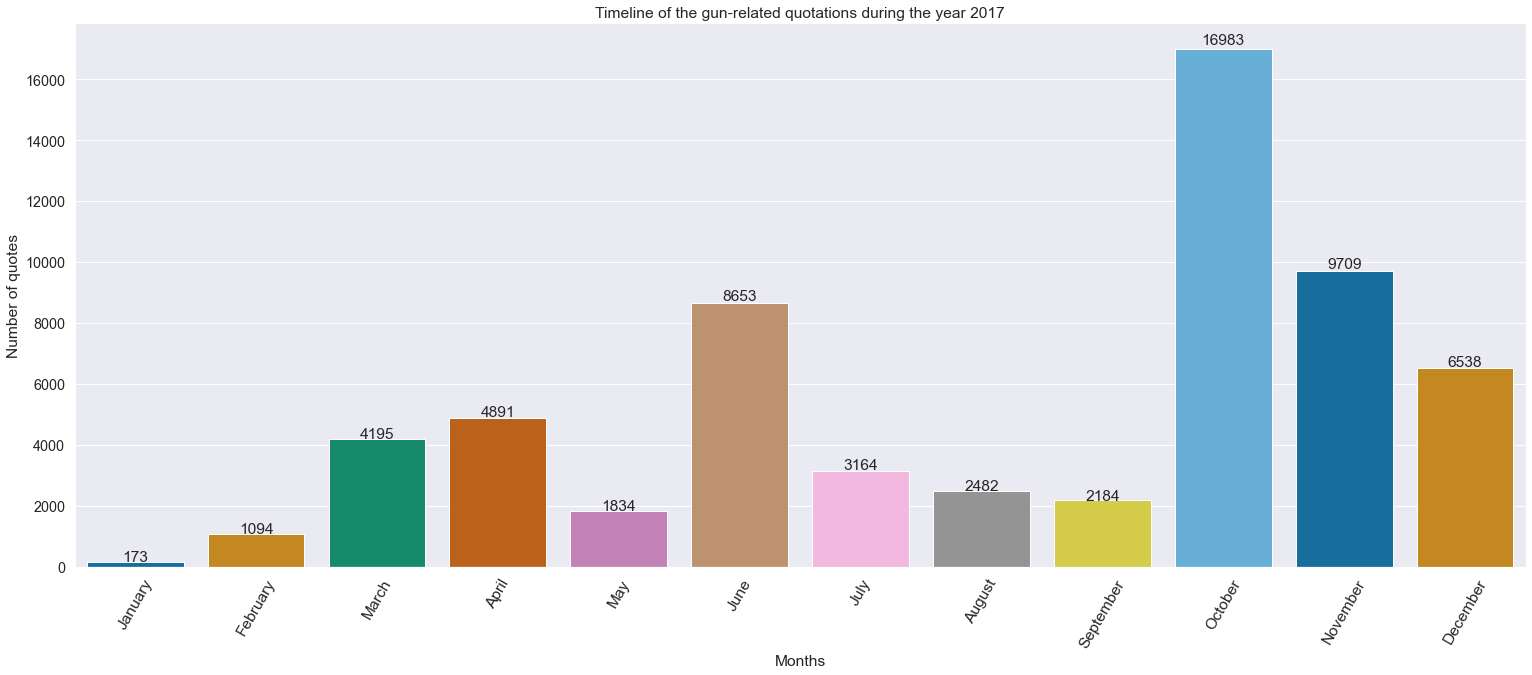

In [18]:
## Plot of the number of quotes related to guns in the year 2017

g2017 = df[(df['date'].dt.year == 2017)]

ax = sns.barplot(x=np.linspace(1,12,12), y=g2017.groupby(g2017['dateWithoutTime'].dt.month).numOccurrences.sum(), palette='colorblind')#, data=gunquotes)
ax.set_xlabel('Months')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations during the year 2017')
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(labels)
plt.xticks(rotation=60, fontsize="medium")
show_values(ax)
plt.show()

The number of quotes for each month plotted on the graph show that there was indeed way more quotes related to gun in October 2017. The graph below zooms on the month of October only, and reveals taht these quotes are mostly distributed on the 2nd to 6th of October. This, along wil the print of some of these quotes allow us to confirm that the important amount of quotes in October 2017 is indeed related to the Lass Vegas shooting of the 1st of October.

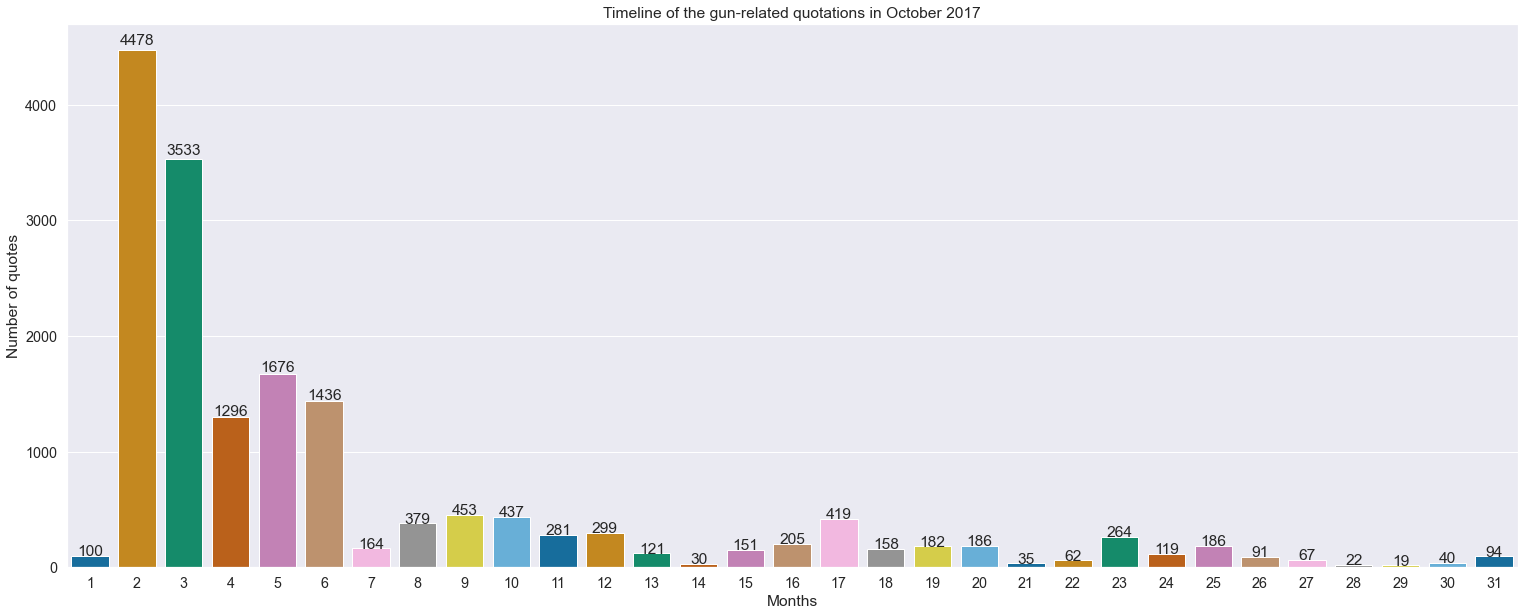

In [32]:
# Zoom on October and the Las Vegas shooting : plot of the number of gunquotes in October 2017

oct_ = g2017[(g2017['date'].dt.month==10)]

ax = sns.barplot(x=np.linspace(1,31,31, dtype='int'), y=oct_.groupby(oct_['dateWithoutTime'].dt.day).numOccurrences.sum(), palette='colorblind')#, data=gunquotes)
ax.set_xlabel('Months')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations in October 2017')
show_values(ax)
plt.show()

In [24]:
print('Some of the quotes of the 2nd of October 2017:')
print(oct_[(oct_['date'].dt.day==2)].quotation.head(5))

Some of the quotes of the 2nd of October 2017:
18285    Republican Members of Congress have a bad habi...
18369    find the courage it will take to make progress...
18422    create a Select Committee on Gun Violence to s...
18497    Although many details of this mass shooting re...
18506    Like other recent acts of domestic terrorism, ...
Name: quotation, dtype: object


In [109]:
# Interractive figure for the website : number of quotes in October 2017

fig = go.Figure()

colors = ['blue',] * 31  # 'rgb(31, 119, 180)'
colors[0] = 'rgb(214, 39, 40)'
colors[1] = 'rgb(200, 39, 40)'
colors[2] = 'rgb(180, 39, 40)'
colors[3] = 'rgb(160, 39, 40)'
colors[4] = 'rgb(140, 39, 40)'
colors[5] = 'rgb(130, 39, 40)'
colors2 = colors[0]


fig.add_trace(go.Bar(x=np.linspace(1,31,31), y=oct_.groupby(oct_['date'].dt.day).numOccurrences.sum(),
                     marker_color=colors, name='Timeline'))
# fig = px.bar(df, x=np.linspace(1,64,64), y=df.groupby(df['date'].dt.to_period('M')).numOccurrences.sum(), labels=dict(x="Time", y="Number of quotes"))
# fig = px.bar(data, x='Time', y='Number of quotes')

fig.update_layout(
    uniformtext=dict(mode='hide'),
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.linspace(1,31,31, dtype='int')
    ),
    title={'text':'Timeline of the gun-related quotes in October 2017', 'x':0.5, 'xanchor':'center'},
   showlegend=False, 
    )

fig.update_xaxes(title_text='Time', fixedrange=False)
fig.update_yaxes(title_text='Number of quotations')

lab_event = labels_events[3] #'Las Vegas shooting'

fig.add_trace(go.Scatter(
    x=[0, 31],
    y=[5000, 5000],
    mode="lines",
    marker_color=colors[30]
))

fig.add_trace(go.Scatter(
    x=[1],
    y=[5000],
    mode="markers",
    marker_color=colors2,
    marker_size=10,
    text=lab_event,
    name="Events",
    textposition="top center"
))

fig.show()
# fig.write_html("timelineyouhouuuu.html")

# Save the plot on Theo's account
py.plot(fig, filename = 'timeline-oct2017', auto_open=True)

'https://plotly.com/~patron.theo/21/'

# 2018 and the Stoneman Douglas High School shooting  
  
Here we focus on a another event that append on the 14th of February 2018. The same proedure as above is followed.

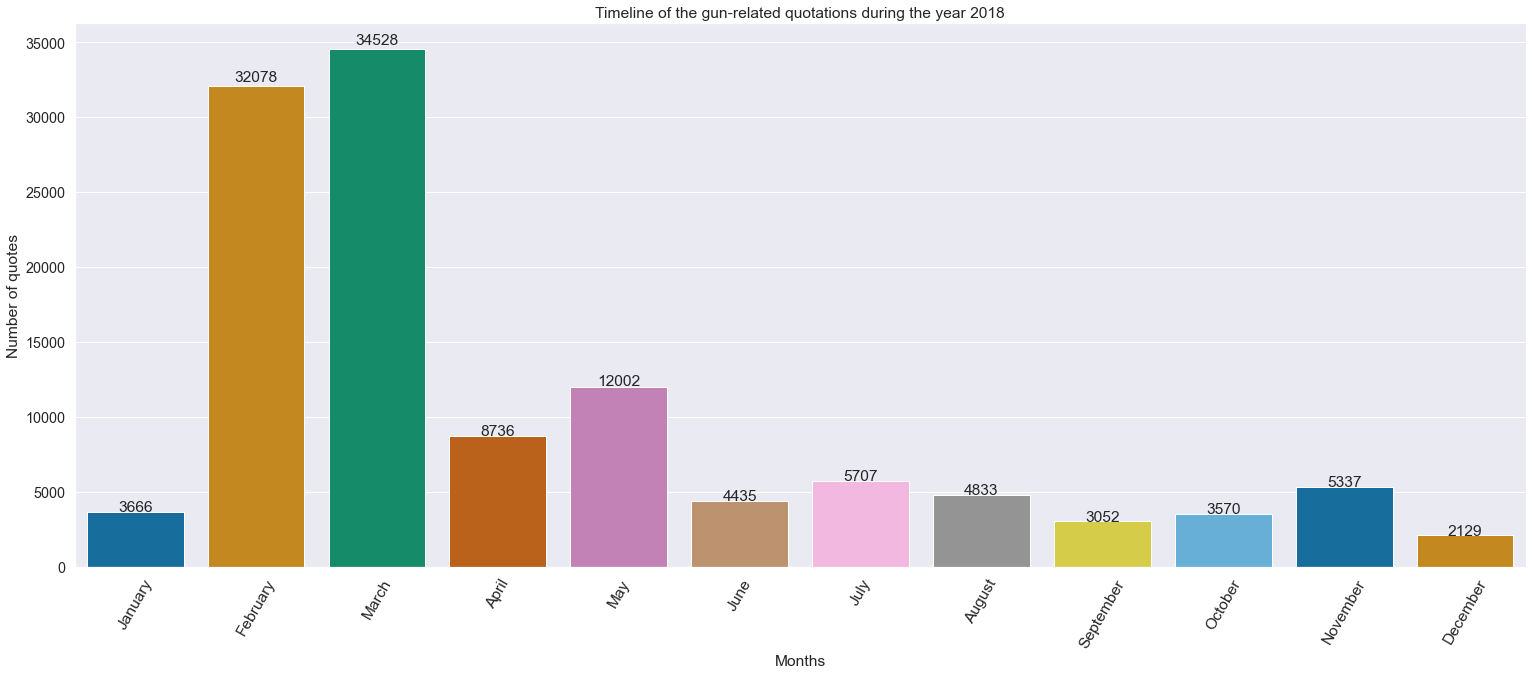

In [79]:
## Plot of the number of quotes related to guns in the year 2018

g2018 = df[(df['date'].dt.year == 2018)]

ax = sns.barplot(x=np.linspace(1,12,12), y=g2018.groupby(g2018['dateWithoutTime'].dt.month).numOccurrences.sum(), palette='colorblind')#, data=gunquotes)
ax.set_xlabel('Months')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations during the year 2018')
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(labels)
plt.xticks(rotation=60, fontsize="medium")
show_values(ax)
plt.show()

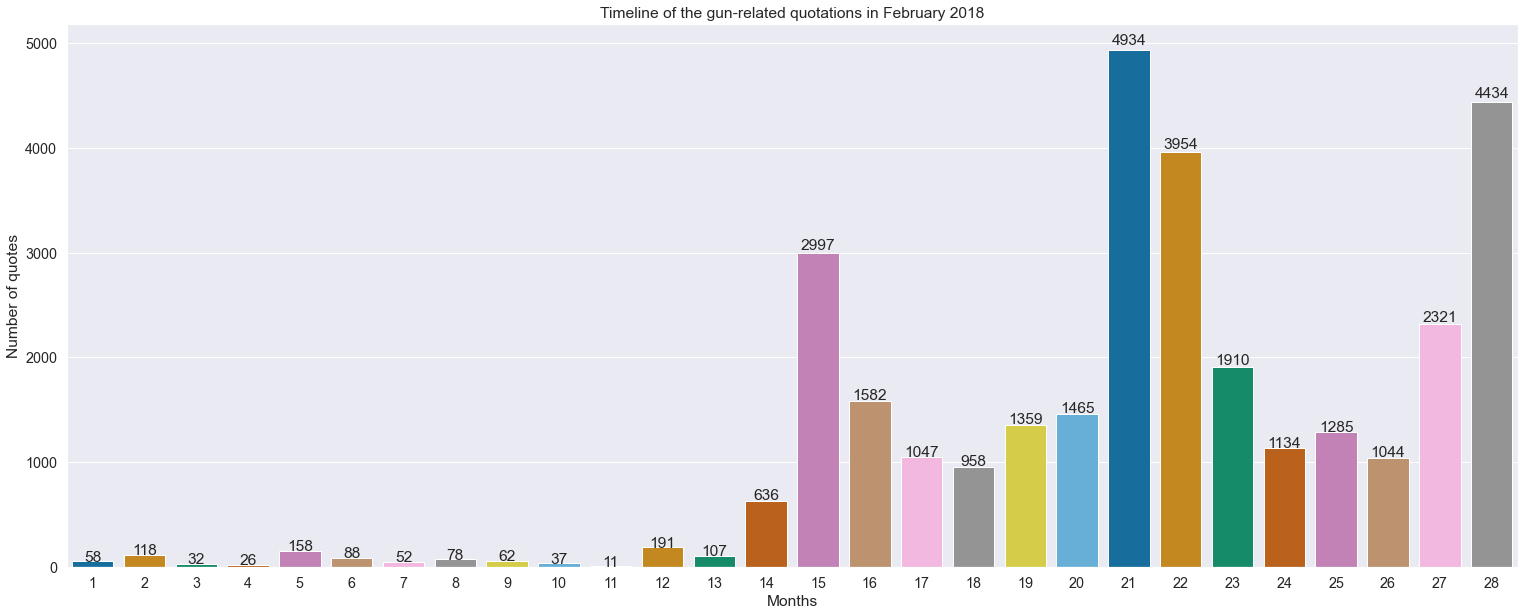

In [82]:
# Zoom on February and the Stoneman Douglas High School shooting : plot of the number of gunquotes in February 2018

feb= g2018[(g2018['date'].dt.month==2)]

ax = sns.barplot(x=np.linspace(1,28,28, dtype='int'), y=feb.groupby(feb['dateWithoutTime'].dt.day).numOccurrences.sum(), palette='colorblind')#, data=gunquotes)
ax.set_xlabel('Months')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations in February 2018')
show_values(ax)
plt.show()

In [83]:
print('Some of the quotes of the 15th of February 2018:')
print(feb[(feb['date'].dt.day==15)].quotation.head(5))

Some of the quotes of the 15th of February 2018:
30356    And sending love to everyone who has been affe...
30387    Who will be the useful idiots that will contin...
30403    For every gun, think of one child going throug...
30509    It didn't take him long to go right to gun con...
30530    I don't know how many times it has to happen f...
Name: quotation, dtype: object


In [90]:
print('Average number of quotations per day for the first half of february (before the 14th):', feb[(feb['date'].dt.day<14)].numOccurrences.sum()/13)
print('Average number of quotations per day for the second half of february (for the 14th and after):', feb[(feb['date'].dt.day>=14)].numOccurrences.sum()/15)

Average number of quotations per day for the first half of february (before the 14th): 78.3076923076923
Average number of quotations per day for the second half of february (for the 14th and after): 2070.6666666666665


Here again, it is obvious that the high school shooting of the 14th of February 2018 had a huge impact on the quotations of the following dates. The average number of gun related quotations for the days before the shooting is about 78 while it is of 2070  for the day of the shooting and the days after.   
Moreover, compared to the event of Las Vegas studied above, this mass shooting had a longer impact : it seems that people continued to speak about it longer.

In [113]:
# Interractive figure for the website : number of quotes in February 2018

fig = go.Figure()

colors = ['blue',] * 28  # 'rgb(31, 119, 180)'
colors[13] = 'rgb(140, 106, 75)'
colors[14] = 'rgb(140, 126, 75)'
colors[15] = 'rgb(140, 146, 75)'
colors[16] = 'rgb(140, 166, 75)'
colors[17] = 'rgb(140, 186, 75)'
colors[18] = 'rgb(140, 206, 75)'
colors[19] = 'rgb(140, 206, 75)'
colors[20] = 'rgb(140, 206, 75)'
colors[21] = 'rgb(140, 206, 75)'
colors[22] = 'rgb(140, 206, 75)'
colors[23] = 'rgb(140, 206, 75)'
colors[24] = 'rgb(140, 206, 75)'
colors[25] = 'rgb(140, 206, 75)'
colors[26] = 'rgb(140, 206, 75)'
colors[27] = 'rgb(140, 206, 75)'
colors2 = colors[13]


fig.add_trace(go.Bar(x=np.linspace(1,28,28), y=feb.groupby(feb['date'].dt.day).numOccurrences.sum(),
                     marker_color=colors, name='Timeline'))

fig.update_layout(
    uniformtext=dict(mode='hide'),
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.linspace(1,28,28, dtype='int')
    ),
    title={'text':'Timeline of the gun-related quotes in February 2018', 'x':0.5, 'xanchor':'center'},
   showlegend=False, 
    )

fig.update_xaxes(title_text='Time', fixedrange=False)
fig.update_yaxes(title_text='Number of quotations')

lab_event = labels_events[5]

fig.add_trace(go.Scatter(
    x=[0, 29],
    y=[6000, 6000],
    mode="lines",
    marker_color=colors[0]
))

fig.add_trace(go.Scatter(
    x=[14],
    y=[6000],
    mode="markers",
    marker_color=colors2,
    marker_size=10,
    text=lab_event,
    name="Events",
    textposition="top center"
))

fig.show()
# fig.write_html("timelineyouhouuuu.html")

# Save the plot on Theo's account
# py.plot(fig, filename = 'timeline-feb2018', auto_open=True)

'https://plotly.com/~patron.theo/19/'